# Leukemia Remission Times

These data are the times of remission (in weeks) of leukemia patients, taken from Table 1.1 of Cox and Oakes (1984).
Out of the 42 total patients, 21 were in a control group, and the other 21 were in a treatment group.
Patients were observed until their leukemia symptoms relapsed or until the study ended, whichever occurred first.
Each patient in the control group experienced relapse before the study ended, while 12 patients in the treatment group did not come out of remission during the study.
Thus, there is heavy right-censoring in the treatment group and no right-censoring in the control group.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", palette="colorblind", color_codes=True)

from survive import datasets
from survive.base import SurvivalData
from survive.nonparametric import KaplanMeier

## Loading the dataset

The `leukemia()` function in the `survive.datasets` module loads a pandas DataFrame containing the leukemia data.
The columns of this DataFrame are
* `time` - The patients' observed leukemia remission times (in weeks).
* `status` - Event/censoring indicator: 1 indicates that the patient's leukemia relapsed, and 0 indicates that the study ended before relapse.
* `group` - Indicates whether a patient is from the control or treatment group.

In [2]:
leukemia = datasets.leukemia()
display(leukemia.head())

,time,status,group
patient,,,
0,1,1,control
1,1,1,control
2,2,1,control
3,2,1,control
4,3,1,control


## Exploratory data analysis with `SurvivalData`

The `SurvivalData` class in `survive.base` is a fundamental class for storing and dealing with survival/lifetime data.
It is aware of groups within the data and allows quick access to various important quantities (like the number of events or the number of individuals at risk at a certain time).

If your survival data is stored in a pandas DataFrame (like the leukemia data is), then a `SurvivalData` object can be created by specifying the DataFrame and the names of the columns corresponding to the observed times, censoring indicators, and group labels.

In [3]:
surv = SurvivalData(time="time", status="status", group="group", df=leukemia)

Alternatively, you may specify one-dimensional arrays of observed times, censoring indicators, and group labels directly.
This is so that your can use `SurvivalData` even if your data aren't stored in a DataFrame.

In [4]:
# Equivalent to the constructor call above
surv = SurvivalData(time=leukemia.time, status=leukemia.status,
                    group=leukemia.group)

### Describing the data

Printing a `SurvivalData` object shows the observed survival times within each group.
Censored times are marked by a plus (indicating that the true survival time for that individual might be longer).

In [5]:
print(surv)

control

 1  1  2  2  3  4  4  5  5  8  8  8  8 11 11 12 12 15 17 22 23

treatment

 6   6   6   6+  7   9+ 10  10+ 11+ 13  16  17+ 19+ 20+ 22  23  25+ 32+ 32+ 34+
35+


The `describe` property of a `SurvivalData` object is a pandas DataFrame containing simple descriptive statistics of the survival data.

In [6]:
display(surv.describe)

,total,events,censored
group,,,
control,21,21,0
treatment,21,9,12


### Plotting the survival data

The `plot_lifetimes()` method of a `SurvivalData` object plots the observed lifetimes of all the individuals in the data.
Censored individuals are marked at the end of their lifespan.

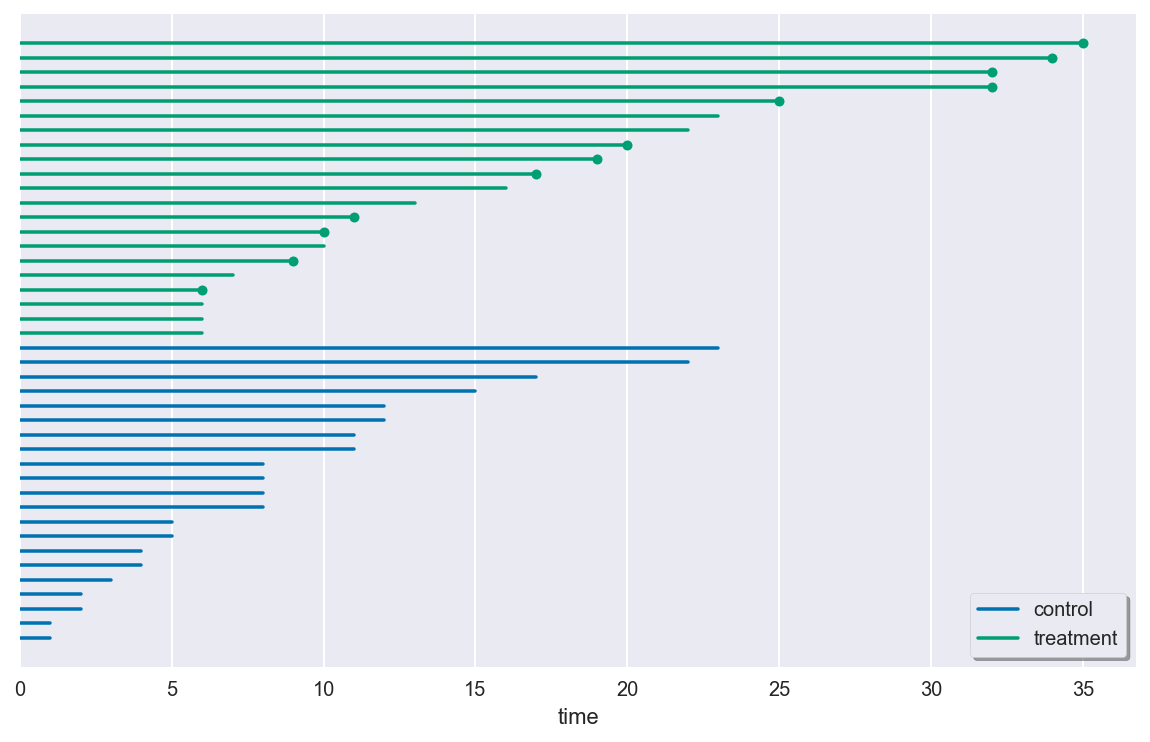

In [7]:
plt.figure(figsize=(10, 6))
surv.plot_lifetimes()
plt.show()
plt.close()

### Number of events and number of individuals at risk

You can compute the number of events that occured at a given time within each group using the `n_events()` method, which returns a pandas DataFrame.

In [8]:
display(surv.n_events([1, 2, 3, 4, 5, 6]))

group,control,treatment
time,,
1,2,0
2,2,0
3,1,0
4,2,0
5,2,0
6,0,3


In a survival study, the number of individuals "at risk" at any given given time is defined to be the number of individuals who have entered the study by that time and have not yet experienced an event or censoring immediately before that time.
This number over time is called the *at-risk process*.

You can compute the number of individuals at risk within each group at a given time using the `n_at_risk()` method.
Like `n_events()`, this method also returns a DataFrame.

In [9]:
display(surv.n_at_risk([0, 5, 10, 20, 25, 30, 35]))

group,control,treatment
time,,
0,21,21
5,14,21
10,8,15
20,2,8
25,0,5
30,0,4
35,0,1


### Plotting the At-Risk Process

You can plot the at-risk process using the `plot_at_risk()` method of a `SurvivalData` object.

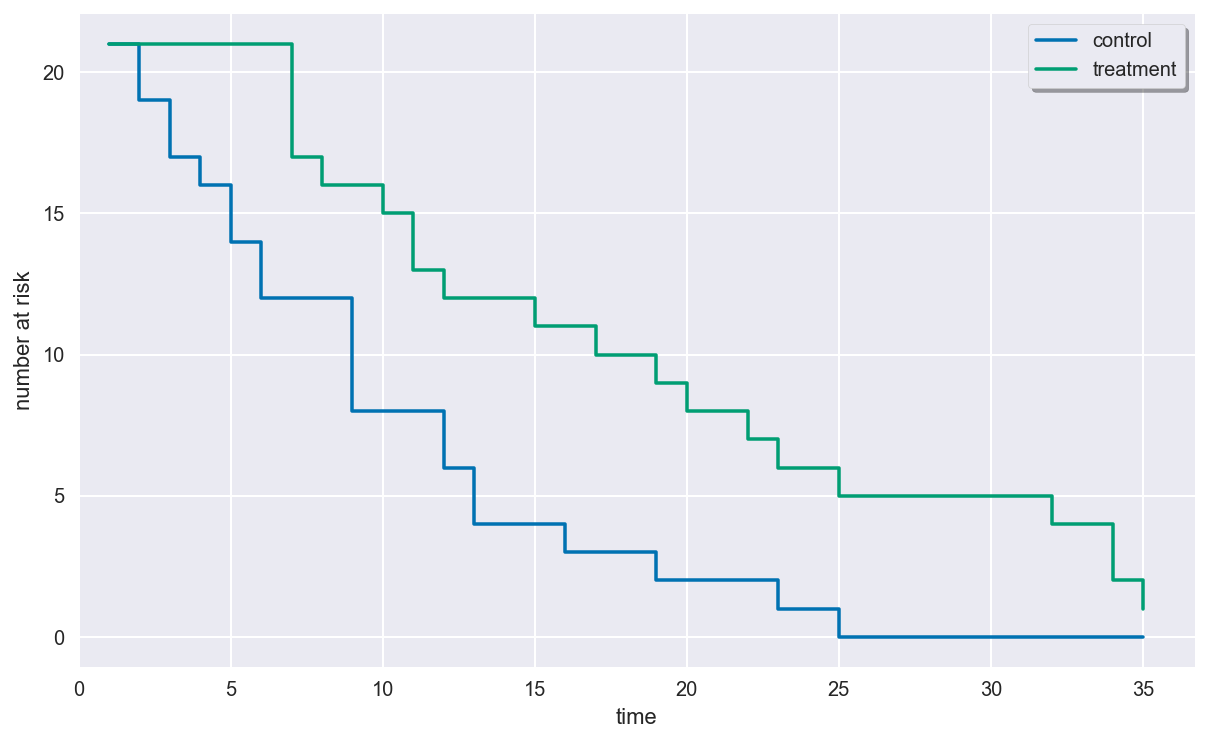

In [10]:
plt.figure(figsize=(10, 6))
surv.plot_at_risk()
plt.show()
plt.close()

## References

* D. R. Cox and D. Oakes.
  Analysis of Survival Data.
  Chapman & Hall, London (1984), pp. ix+201.